In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
    
    def fit(self, X):
        X = X - np.mean(X, axis=0)
        
        cov_matrix = np.cov(X.T)
        
        eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
        
        eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:, i]) for i in range(len(eig_vals))]
        eig_pairs.sort(key=lambda x: x[0], reverse=True)
        
        self.components = np.hstack([eig_pairs[i][1].reshape(len(eig_vals), 1) for i in range(self.n_components)])

    def transform(self, X):
        X = X - np.mean(X, axis=0)
        
        return X.dot(self.components)


In [8]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
data = pd.read_csv(url, names=names)

In [9]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

In [10]:
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)

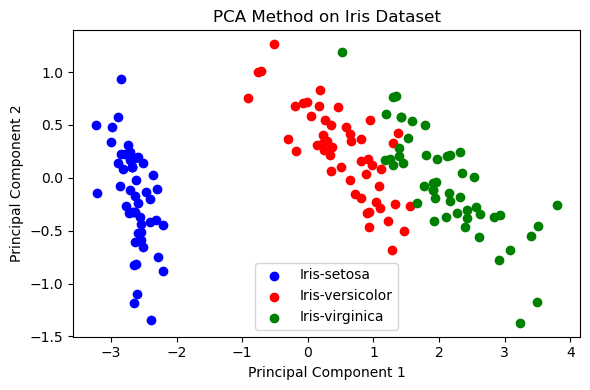

In [12]:
plt.figure(figsize=(6, 4))
for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'), 
                    ('blue', 'red', 'green')):
    plt.scatter(X_pca[y==lab, 0],
                X_pca[y==lab, 1],
                label=lab,
                c=col)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='lower center')
plt.title('PCA Method on Iris Dataset')
plt.tight_layout()
plt.show()